
# Historical TC Track Analogs
This sample script shows how to use Tropycal to retrieve and plot historical tropical cyclone track analogs.


In [18]:
from tropycal import tracks

## Reading In HURTDAT2 Dataset

Let's start with the HURDAT2 dataset by loading it into memory. By default, this reads in the HURDAT dataset from the National Hurricane Center (NHC) website, unless you specify a local file path using either ``atlantic_url`` for the North Atlantic basin on ``pacific_url`` for the East & Central Pacific basin.

HURDAT data is not available for the current year. To include the latest data up through today, the "include_btk" flag needs to be set to True, which reads in preliminary best track data from the NHC website. For this example, we'll set this to False.

Let's create an instance of a TrackDataset object, which will store the North Atlantic HURDAT2 dataset in memory. Once we have this we can use its methods for various types of analyses.



In [19]:
basin = tracks.TrackDataset(basin='north_atlantic',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (1.74 seconds)


## Historical Tropical Cyclone Analogs

One popular tool for finding historical tropical cyclone track analogs is via NOAA: https://coast.noaa.gov/hurricanes/#map=4/32/-80

Tropycal now has similar functionality, with 4 new analog functions added to `TrackDataset`:

- ``basin.analogs_from_point()`` - Retrieve storms within a radius of a point and their closest approach to the point
- ``basin.analogs_from_shape()`` - Retrieve storms within a bounded shape provided by a list of lat/lon coordinates
- ``basin.plot_analogs_from_point()`` - Plot output from analog_from_point()
- ``basin.plot_analogs_from_shape()`` - Plot output from analog_from_shape()

Let's start out with `analogs_from_point` by looking at all tropical cyclone tracks within 50 kilometers of NYC. For this sample script we'll use kilometers, but if you want to use miles, add a ``units='miles'`` argument.

Note that the first time you run an analog function, if storms in `basin` haven't been interpolated to hourly yet, this will automatically perform that interpolation on the back end, and future calls within the same kernel won't need to re-interpolate making them much faster.



In [20]:
target_cities = {
    "New Orleans, USA": (29.9511, -90.0715),
    "Houston, USA": (29.7604, -95.3698),
    "Tampa, USA": (27.9506, -82.4572),
    "Miami, USA": (25.7617, -80.1918),
    "Corpus Christi, USA": (27.8006, -97.3964),
    "Pensacola, USA": (30.4213, -87.2169),
    "Mobile, USA": (30.6954, -88.0399),
    "Galveston, USA": (29.3013, -94.7977),
    "Biloxi, USA": (30.3960, -88.8853),
    "Key West, USA": (24.5551, -81.7800),
    "Veracruz, Mexico": (19.1738, -96.1342),
    "Tampico, Mexico": (22.2553, -97.8686),
    "Campeche, Mexico": (19.8453, -90.5235),
    "Cancún, Mexico": (21.1619, -86.8515),
    "Mérida, Mexico": (20.9674, -89.5926),
    "Ciudad del Carmen, Mexico": (18.6491, -91.8071),
    "Progreso, Mexico": (21.2836, -89.6645),
    "Coatzacoalcos, Mexico": (18.1489, -94.4202),
    "Tuxpan, Mexico": (20.9589, -97.4044),
    "Havana, Cuba": (23.1136, -82.3666),
    "Varadero, Cuba": (23.1547, -81.2546),
    "Cienfuegos, Cuba": (22.1613, -80.4490),
    "Belize City, Belize": (17.5046, -88.1962),
    "George Town, Cayman Islands": (19.2869, -81.3674),
    "Nassau, Bahamas": (25.0343, -77.3963)
}

currentPoint = target_cities["New Orleans, USA"]

In [21]:
basin.analogs_from_point((currentPoint[0], currentPoint[1]),radius=50)

--> Starting to interpolate storms
--> Completed interpolating storms (5.77 seconds)


{'AL011860': np.float64(38.3),
 'AL051869': np.float64(32.9),
 'AL131887': np.float64(42.6),
 'AL041892': np.float64(17.5),
 'AL081893': np.float64(29.9),
 'AL011914': np.float64(21.0),
 'AL061915': np.float64(14.7),
 'AL041936': np.float64(12.4),
 'AL091936': np.float64(39.4),
 'AL041939': np.float64(39.6),
 'AL041947': np.float64(11.6),
 'AL051948': np.float64(8.9),
 'AL011955': np.float64(32.8),
 'AL051955': np.float64(22.2),
 'AL051971': np.float64(9.6),
 'AL111971': np.float64(15.2),
 'AL061975': np.float64(24.7),
 'AL181975': np.float64(8.8),
 'AL151977': np.float64(42.7),
 'AL041979': np.float64(33.5),
 'AL021988': np.float64(3.6),
 'AL071988': np.float64(9.6),
 'AL012001': np.float64(30.4),
 'AL022002': np.float64(19.8),
 'AL102002': np.float64(14.9),
 'AL032003': np.float64(43.7),
 'AL032005': np.float64(28.7),
 'AL122005': np.float64(45.9),
 'AL032020': np.float64(5.5),
 'AL282020': np.float64(10.6),
 'AL032021': np.float64(29.0)}

The output from this function is a dictionary, with the **key** the storm ID and **value** the distance from the point in kilometers.

The default ordering of the dict is by chronological order. We can resort it to be ordered by distance from the point as follows:



In [22]:
analogs = basin.analogs_from_point((40.7,-74.0),radius=50)
dict(sorted(analogs.items(), key=lambda item: item[1]))

{'AL091971': np.float64(6.1),
 'AL041893': np.float64(8.4),
 'AL092011': np.float64(11.1),
 'AL031955': np.float64(14.5),
 'AL061874': np.float64(16.0),
 'AL021972': np.float64(19.4),
 'AL051872': np.float64(20.2),
 'AL021996': np.float64(20.9),
 'AL061863': np.float64(22.2),
 'AL062020': np.float64(24.1),
 'AL051861': np.float64(25.6),
 'AL031960': np.float64(27.9),
 'AL082008': np.float64(37.1),
 'AL081999': np.float64(43.6)}

We can then plot these storms relative to the point using `plot_analogs_from_point`:



<GeoAxes: title={'left': 'TCs Within 50 km of 40.7°N, 74.0°W', 'right': 'Number of storms: 14\nJan 01 – Dec 31 • 1851 – 2023'}>

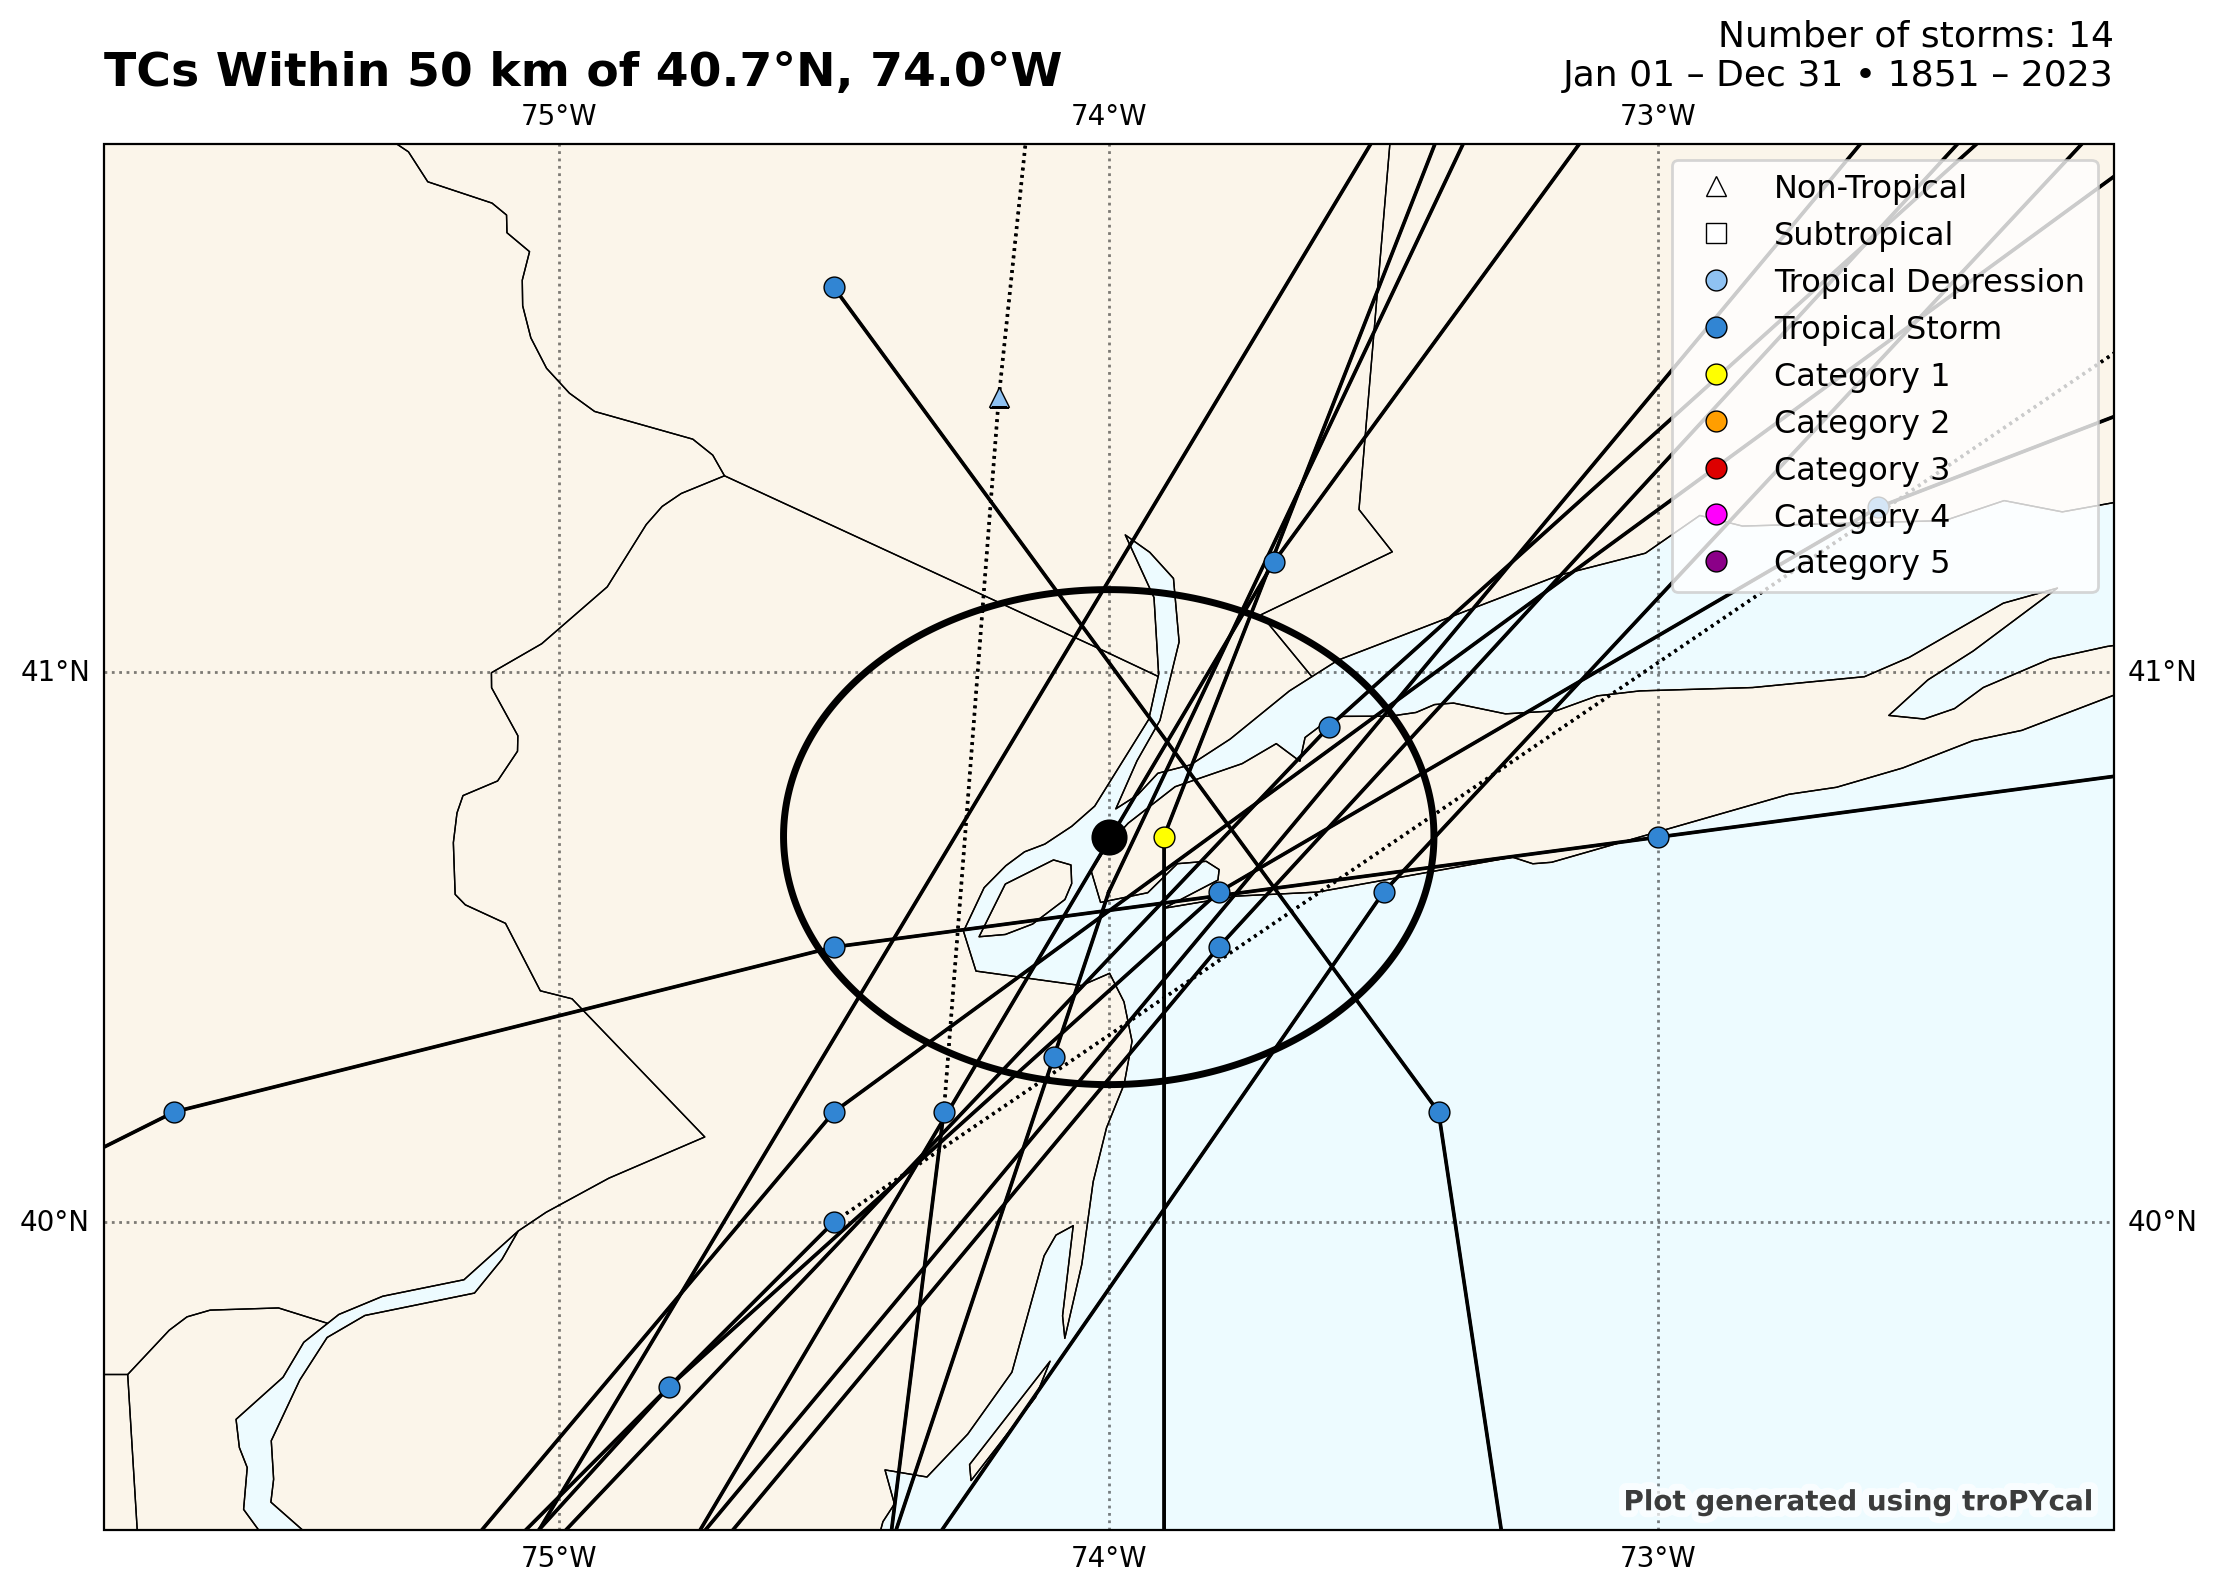

In [23]:
basin.plot_analogs_from_point((40.7,-74.0),radius=50)

We can further customize the analogs by adding thresholds by year range, time of year, sustained wind and MSLP.

Let's test this out by expanding the radius to 100 km, adding a minimum sustained wind of 65 kt (i.e., Category 1 hurricane), and from May to October:



{'AL041893': np.float64(8.4), 'AL071934': np.float64(79.2), 'AL061938': np.float64(92.7), 'AL051960': np.float64(89.2), 'AL071976': np.float64(69.7), 'AL091985': np.float64(60.1)}


<GeoAxes: title={'left': 'TCs Within 100 km of 40.7°N, 74.0°W', 'right': 'Number of storms: 6\nMay 01 – Oct 01 • 1851 – 2023'}>

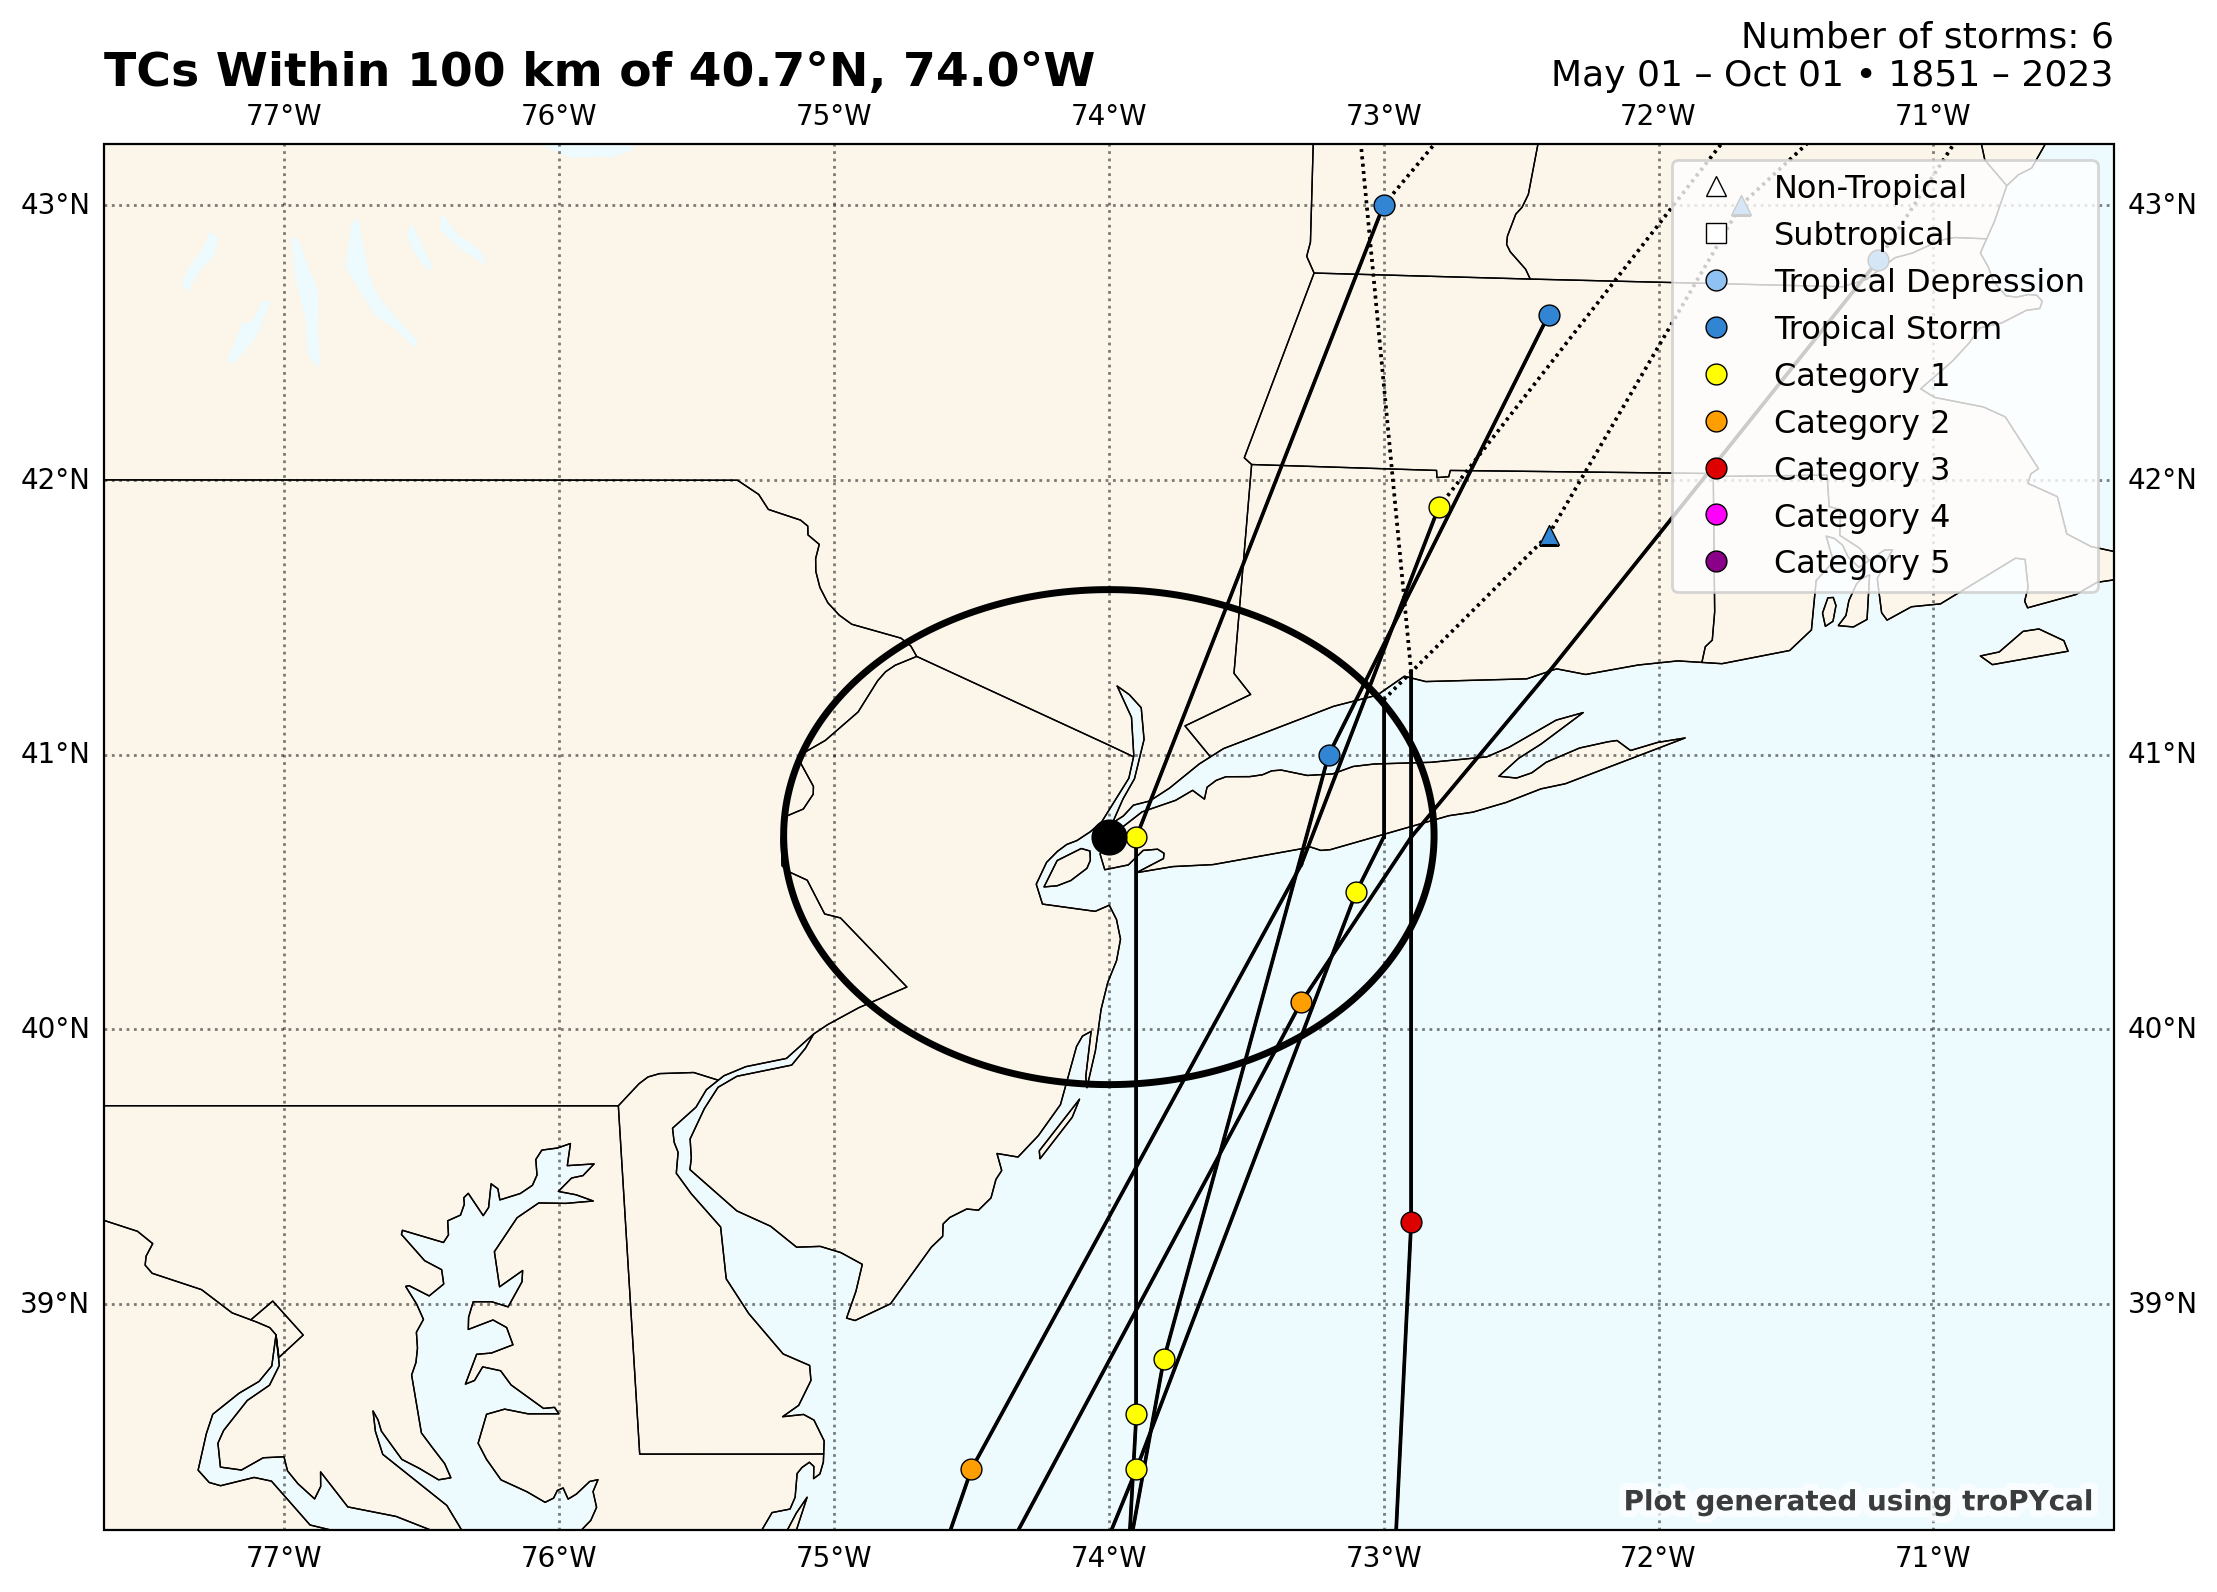

In [24]:
#Print storms
storms = basin.analogs_from_point((40.7,-74.0),radius=100,date_range=('5/1','10/1'),thresh={'v_min':65})
print(storms)

#Plot storms
basin.plot_analogs_from_point((40.7,-74.0),radius=100,date_range=('5/1','10/1'),thresh={'v_min':65})

Let's say we want to automatically plot the closest storm to a point that meets our threshold. The below code automates this for any lat/lon coordinate.

This example is for NYC - feel free to play around with any lat/lon coordinate of your choice!



<GeoAxes: title={'left': 'Hurricane UNNAMED', 'right': '15 Aug 1893 – 24 Aug 1893\n100 kt • 952 hPa • 24.6 ACE'}>

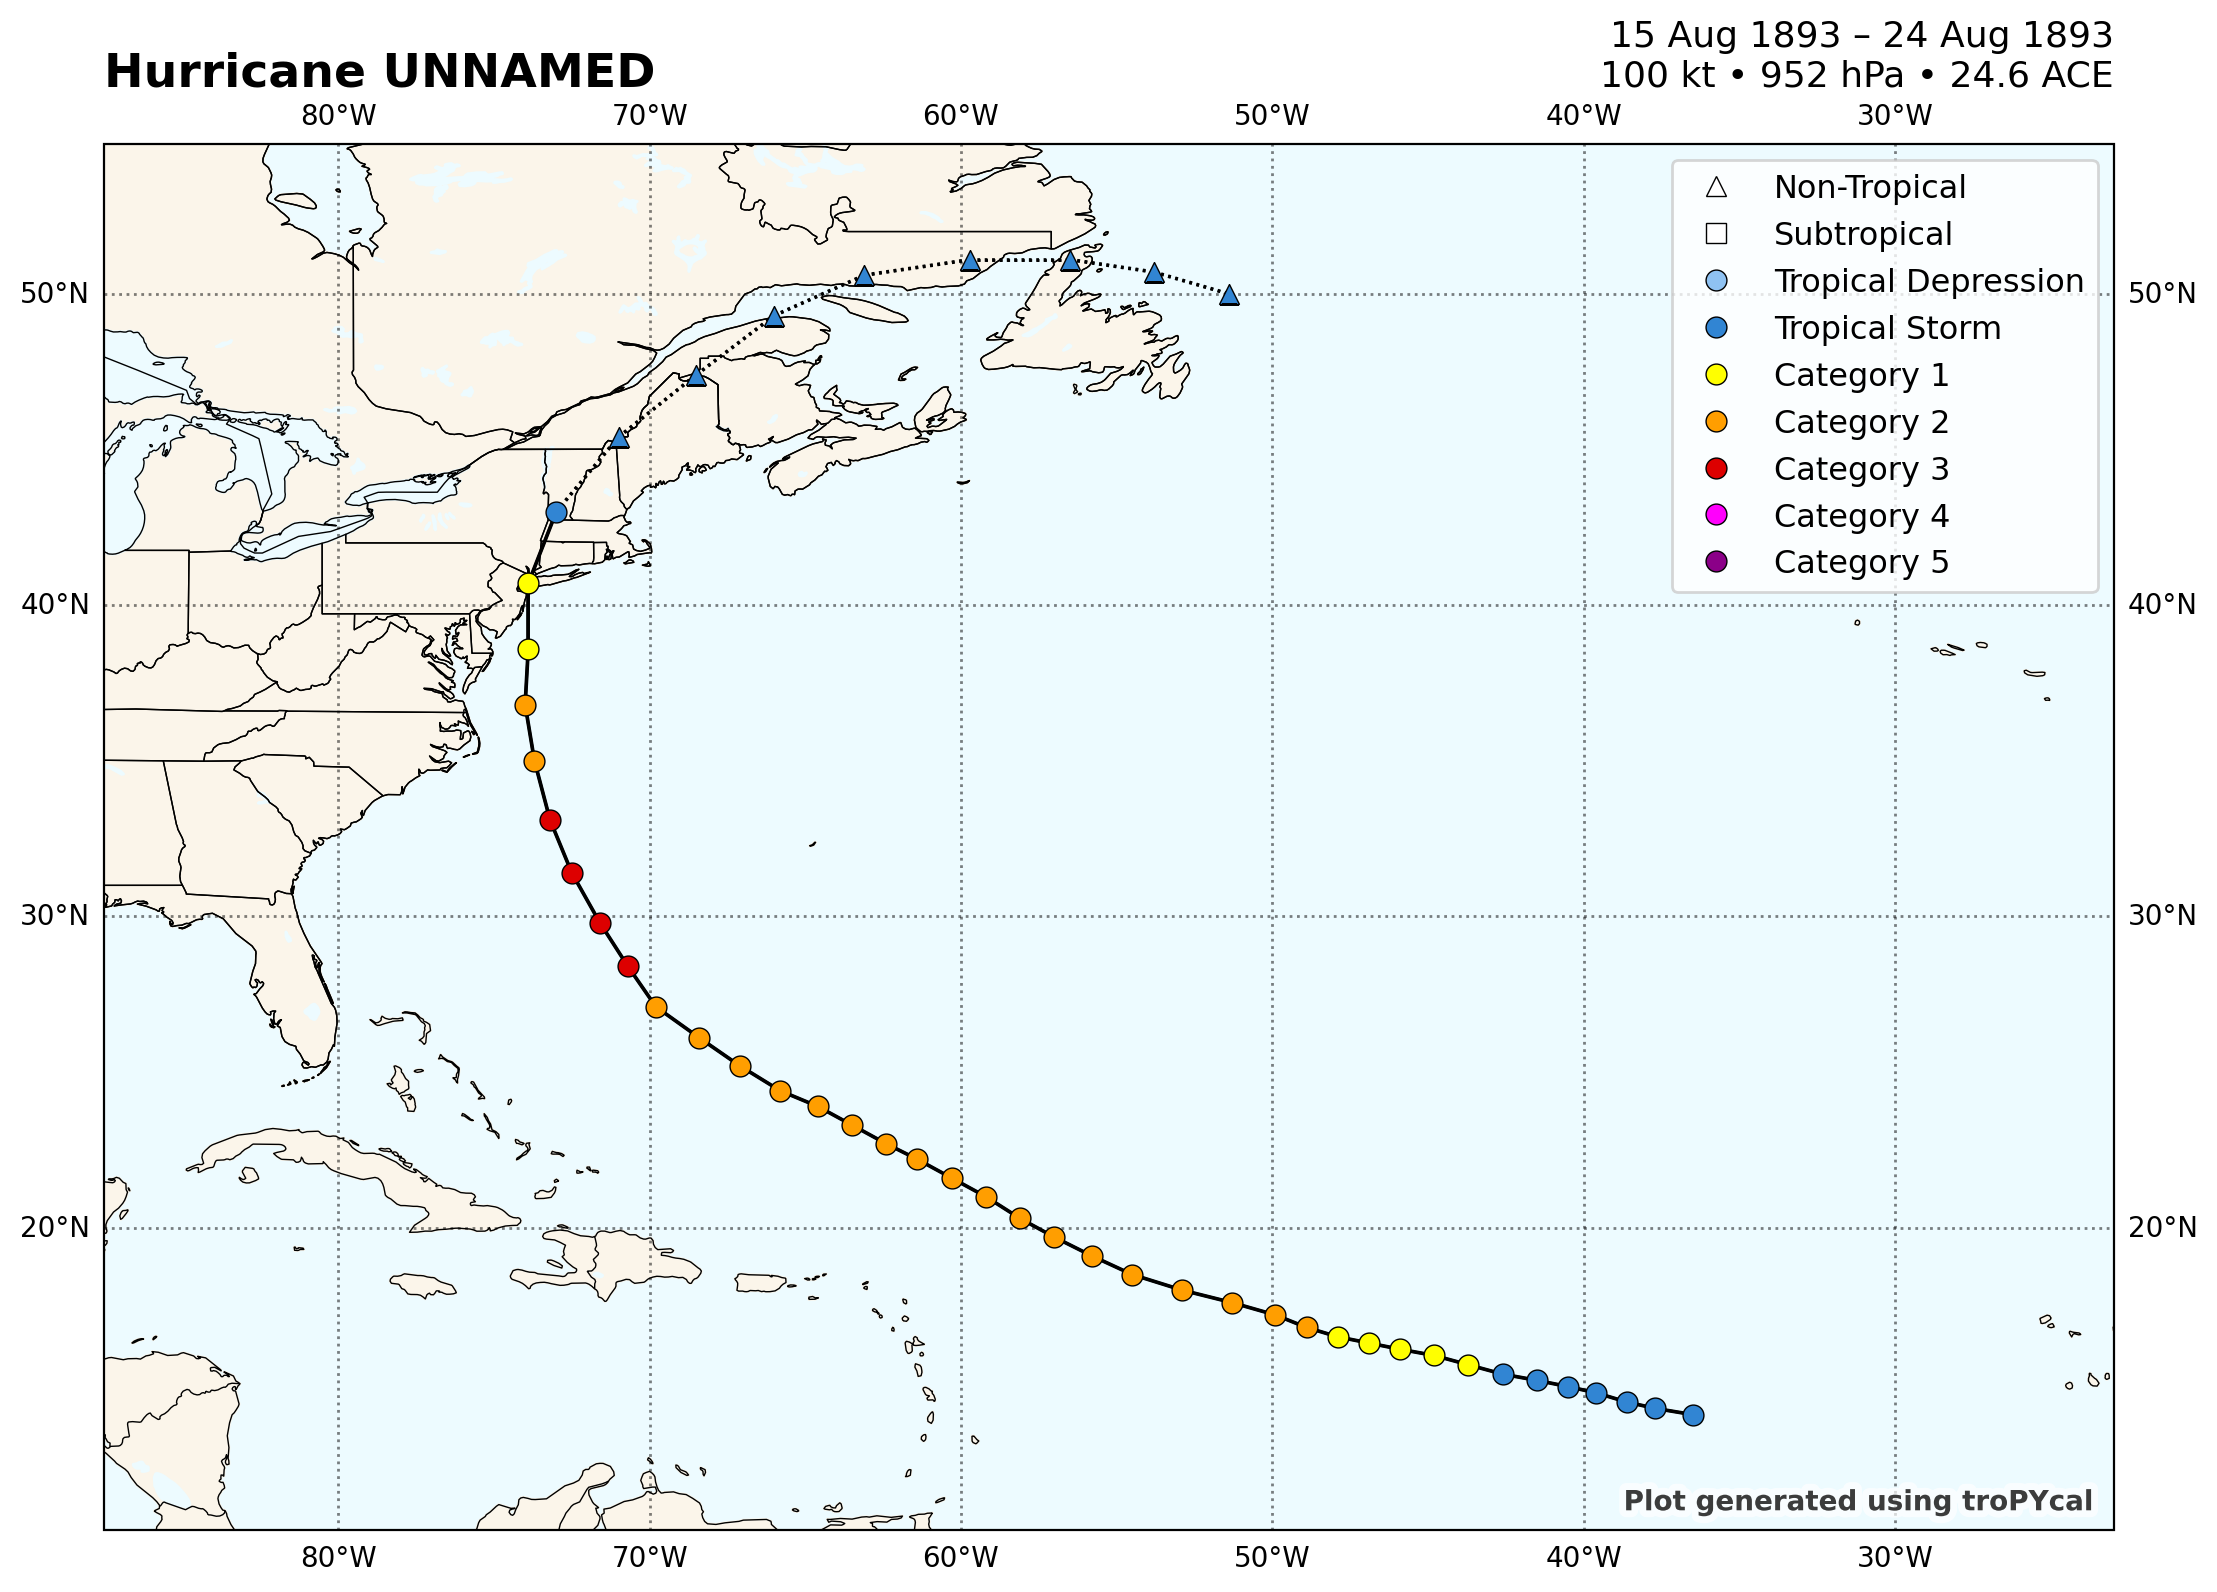

In [25]:
point = (40.7,-74.0) #NYC lat/lon

#Retrieve dict of analogs
analogs = basin.analogs_from_point(point,radius=100,date_range=('5/1','10/1'),thresh={'v_min':65})

#Sort by ascending value, meaning the first entry is the smallest distance from the point
analogs_sorted = sorted(analogs.items(), key=lambda item: item[1])

#Get ID of closest storm, which will be the first item of the first entry of analogs_sorted
closest_storm = analogs_sorted[0][0]

#Plot storm
basin.plot_storm(closest_storm)

Lastly, we can also use a custom domain created by a list of lat/lon coordinate pairs.

The example below plots all* tropical cyclones that passed through the New Jersey to Long Island coastline between 1950 and 2022, with additional plotting properties of (1) not plotting dots and (2) coloring lines by SSHWS category.

*Note: Tropical cyclone tracks are interpolated to hourly; therefore, a point only counts if its hourly track passed through the specified domain. Note the 1938 "Long Island Express" Hurricane doesn't appear below, as it moved at an anomalously fast forward speed.*



['AL061954', 'AL031955', 'AL031960', 'AL051960', 'AL061961', 'AL161968', 'AL091971', 'AL021972', 'AL071976', 'AL091985', 'AL101985', 'AL021996', 'AL081999', 'AL082008', 'AL092011', 'AL062020', 'AL052021']


<GeoAxes: title={'left': 'TC Tracks Within Bounded Region', 'right': 'Number of storms: 17\nJan 01 – Dec 31 • 1950 – 2022'}>

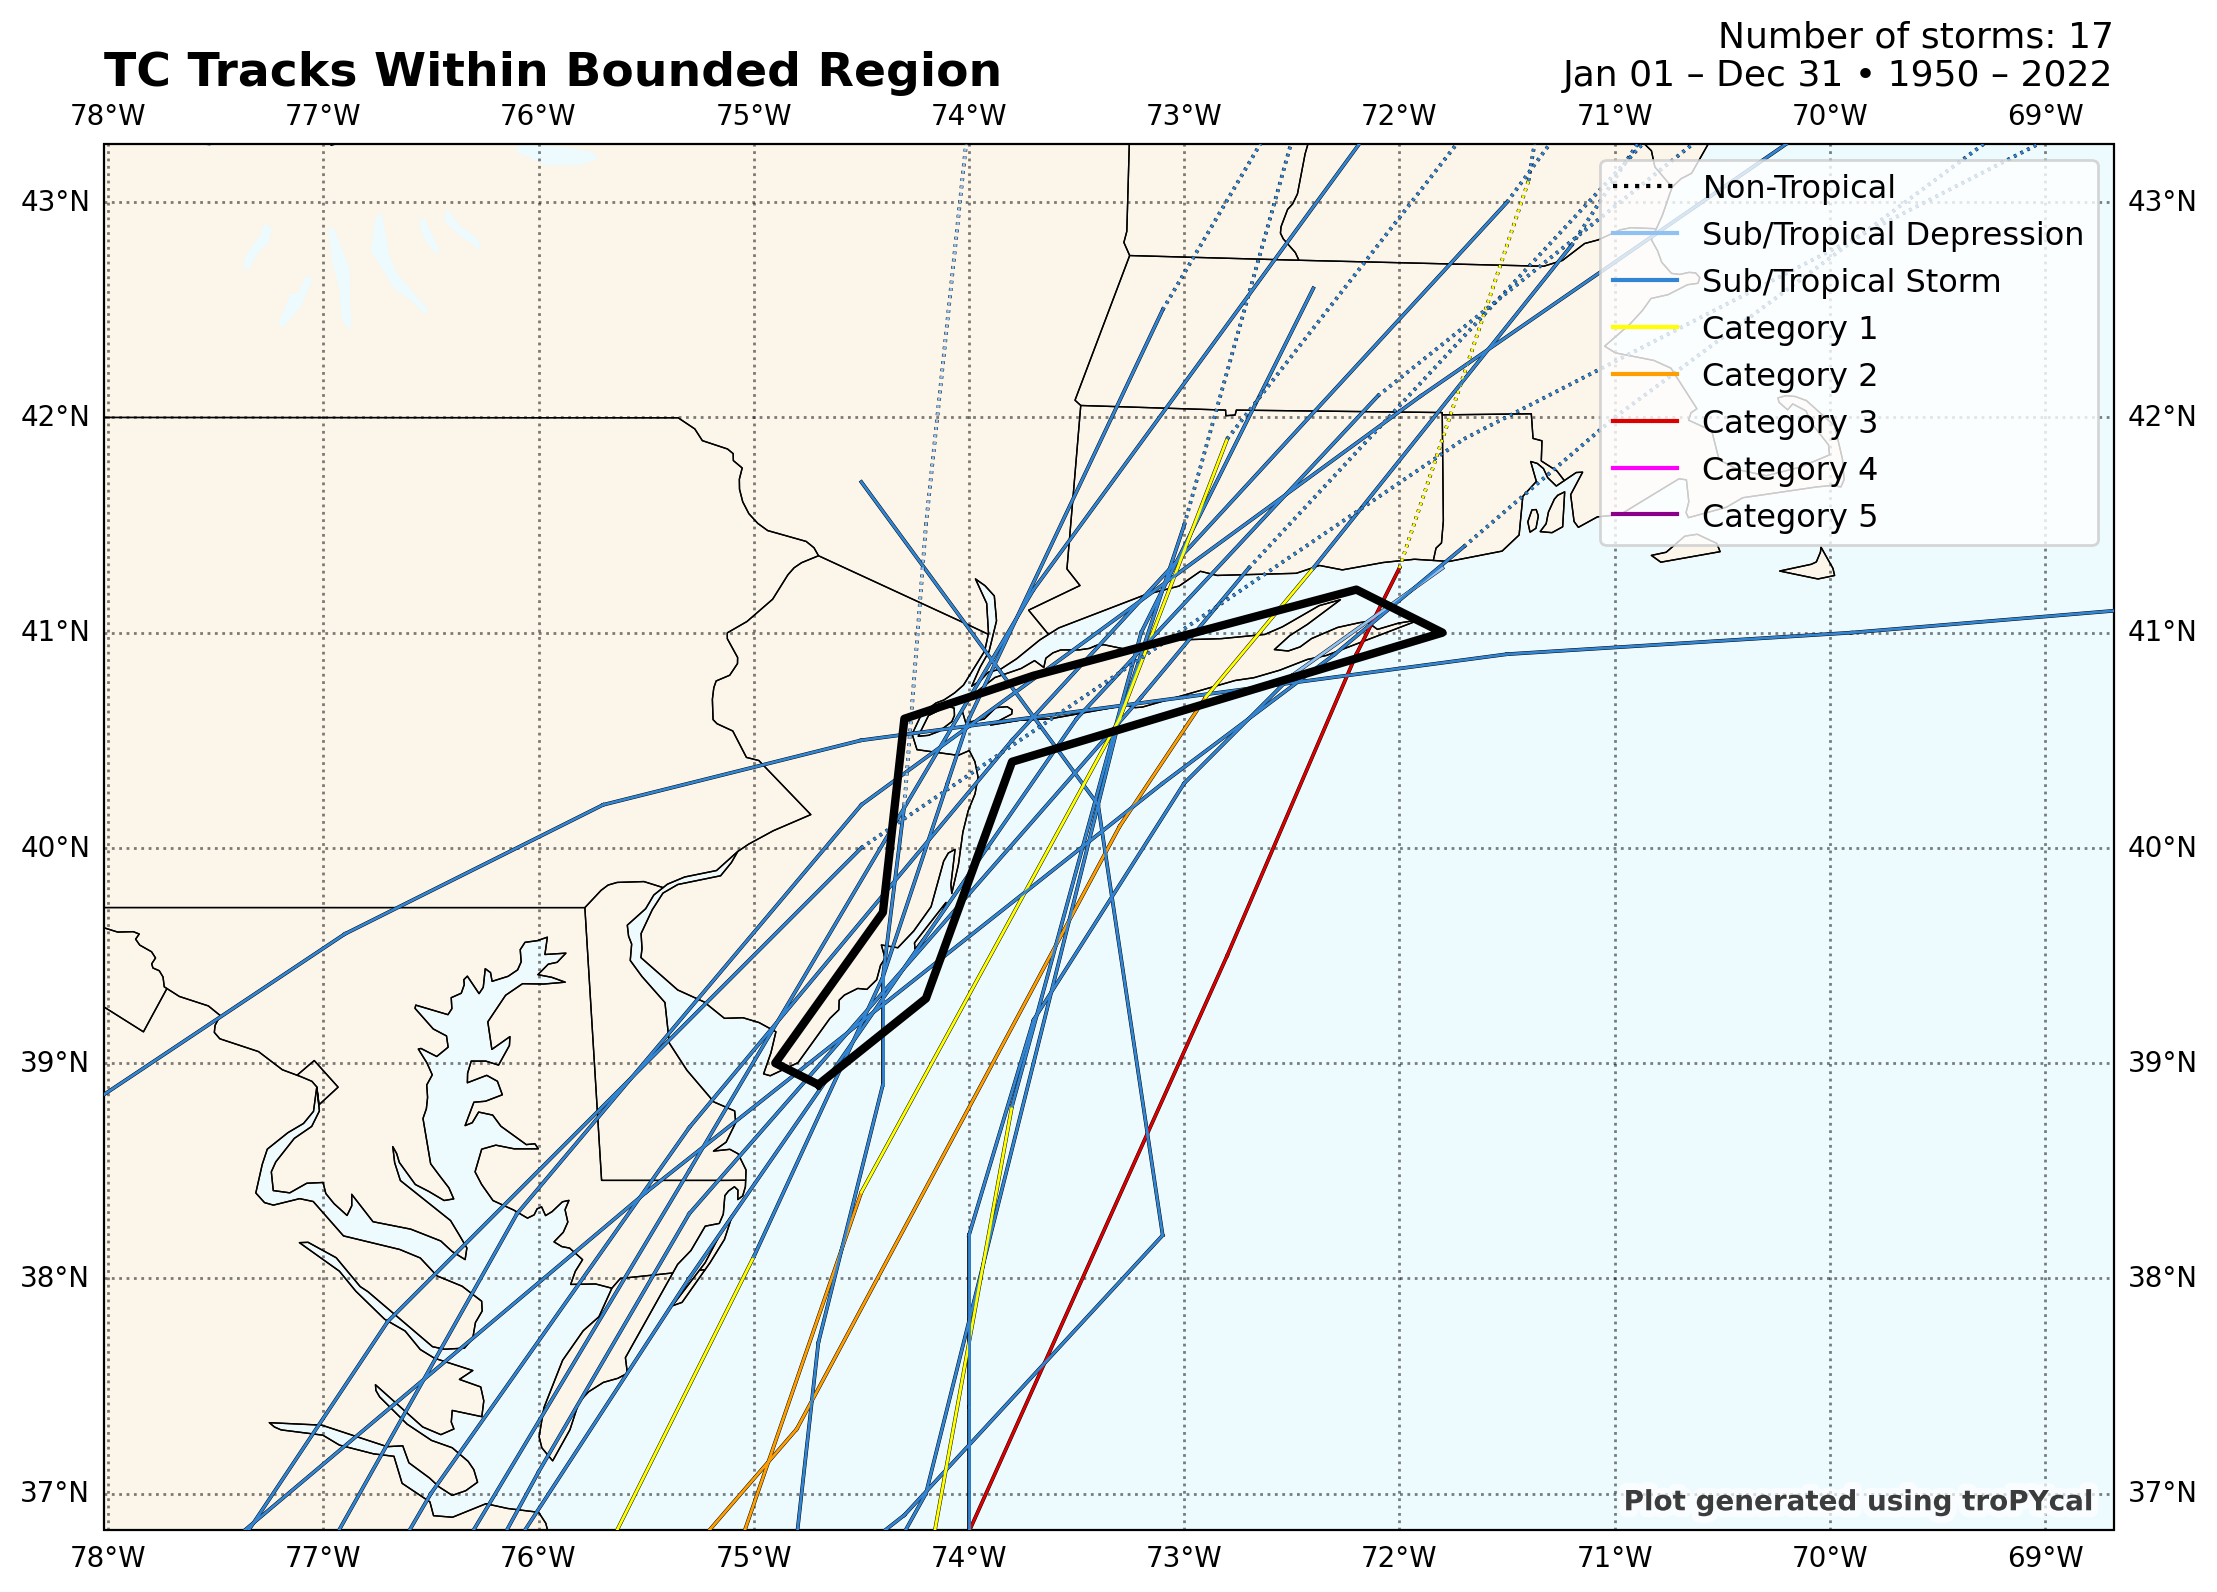

In [26]:
points = [
    (38.9, -74.7),
    (39.3, -74.2),
    (40.4, -73.8),
    (41.0, -71.8),
    (41.2, -72.2),
    (40.8, -73.7),
    (40.6, -74.3),
    (39.7, -74.4),
    (39.0, -74.9)
]

#Retrieve list of storms that meet this criteria
storms = basin.analogs_from_shape(points,year_range=(1950,2022))
print(storms)

#Plot storms
basin.plot_analogs_from_shape(points,year_range=(1950,2022),prop={'dots':False,'linecolor':'category'})